<a href="https://colab.research.google.com/github/yishanhsieh/a30-spr2024/blob/main/Lab9(DiDS7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# chapter 7 - unsupervised learning

Rolling the dice

In [ ]:
#generate a list of 1800 random rolls from two dice
from random import choices,seed
numberofrolls=1800
seed(9)
dice1=choices([1,2,3,4,5,6], k=numberofrolls)
dice2=choices([1,2,3,4,5,6], k=numberofrolls)

In [ ]:
print(dice1[0:10])

[3, 3, 1, 6, 1, 4, 6, 1, 4, 4]


In [ ]:
dicesum=[dice1[n]+dice2[n] for n in range(numberofrolls)]


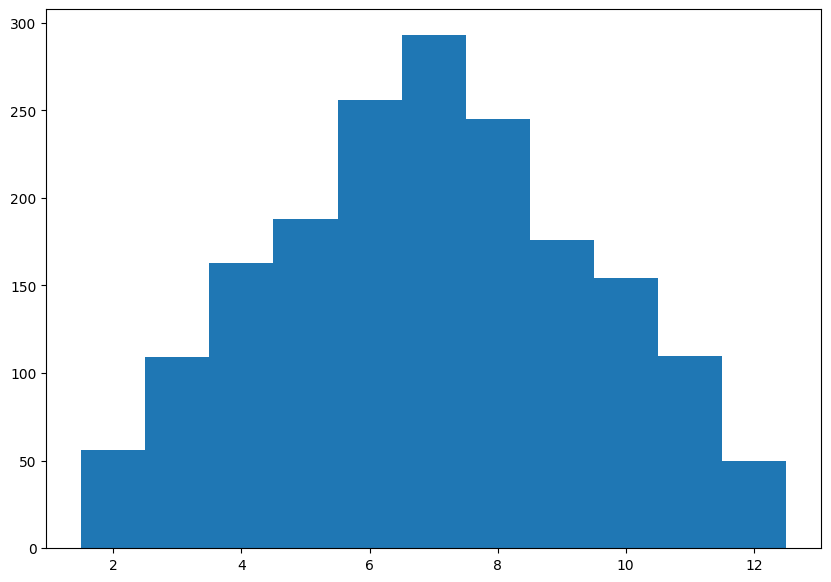

In [ ]:
# visualize the outcomes of 1800 simulated dice rolls
from matplotlib import pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(dicesum,bins=[2,3,4,5,6,7,8,9,10,11,12,13],align='left')
plt.show()


seems to have a normal distribution

In [ ]:
#calculate the mean and standard deviation of our dice roll data
def getcenter(allpoints):
  center=np.mean(allpoints)
  stdev=np.sqrt(np.cov(allpoints))
  return(center,stdev)
print(getcenter(dicesum))

(6.9511111111111115, 2.468219092930105)


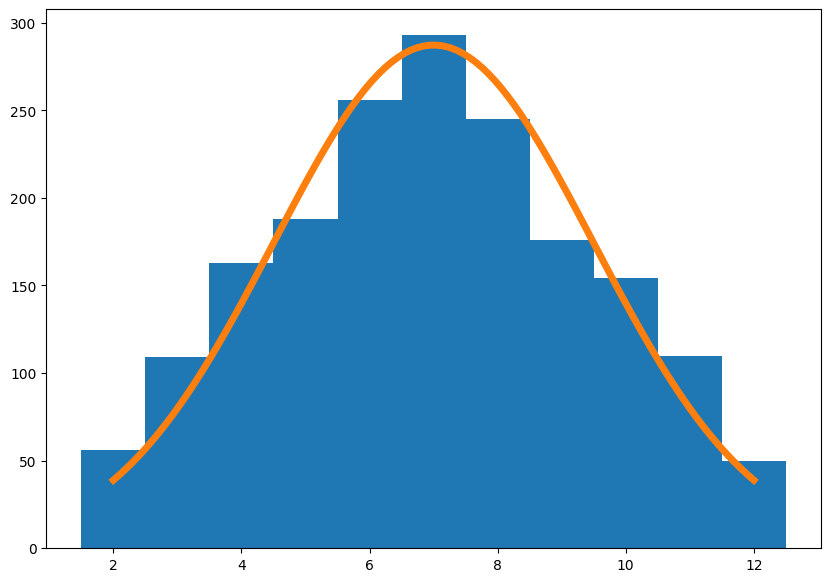

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(dicesum,bins=range(2,14),align='left')
import scipy.stats as stats
import math
mu=7
sigma=2.5
x = np.linspace(mu - 2*sigma, mu + 2*sigma, 100)*1
plt.plot(x, stats.norm.pdf(x, mu, sigma)*numberofrolls,linewidth=5)
plt.show()

In [ ]:
#check the number of rolls predicted by the curve
print(stats.norm.pdf(2, mu, sigma)*numberofrolls)
print(stats.norm.pdf(7, mu, sigma)*numberofrolls)
print(stats.norm.pdf(12, mu, sigma)*numberofrolls)

38.8734958894954
287.23844188903155
38.8734958894954


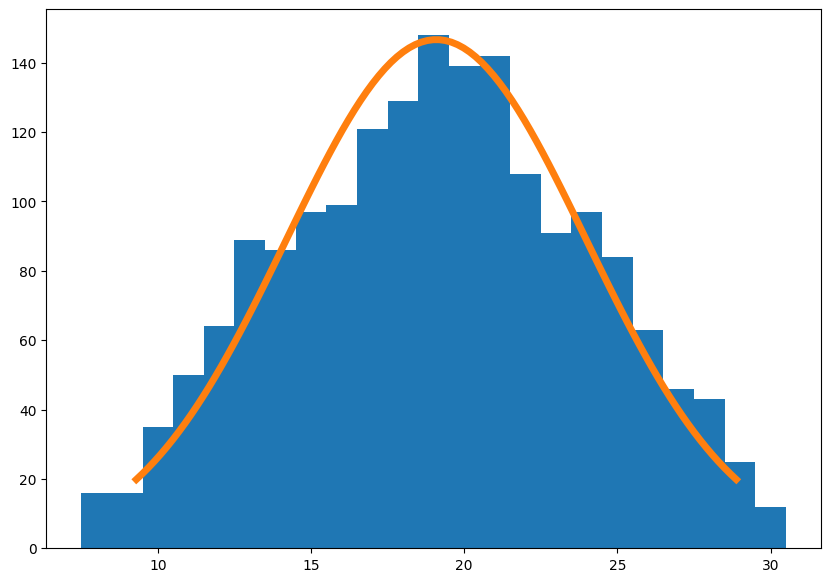

In [ ]:
# roll a pair of nonstandard 12-sided dice
# number 4,5,6,....15

seed(913)
dice1=choices([4,5,6,7,8,9,10,11,12,13,14,15], k=numberofrolls)
dice2=choices([4,5,6,7,8,9,10,11,12,13,14,15], k=numberofrolls)
dicesum12=[dice1[n]+dice2[n] for n in range(numberofrolls)]
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(dicesum12,bins=range(8,32),align='left')
mu=np.mean(dicesum12)
sigma=np.std(dicesum12)
x = np.linspace(mu - 2*sigma, mu + 2*sigma, 100)*1
plt.plot(x, stats.norm.pdf(x, mu, sigma)*numberofrolls,linewidth=5)
plt.show()

19 is the most likely outcome

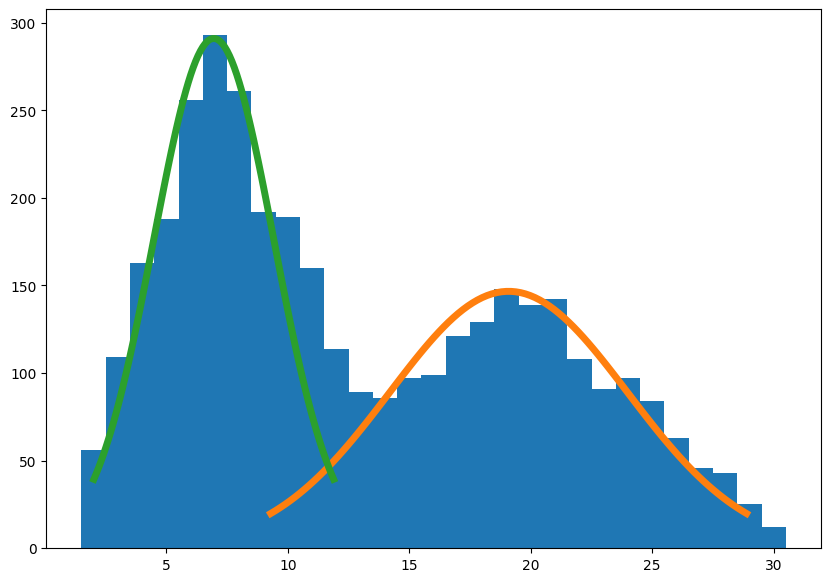

In [ ]:
#  6-sided and 12-sided dice pairs

dicesumboth=dicesum+dicesum12
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(dicesumboth,bins=range(2,32),align='left')
import scipy.stats as stats
import math
mu=np.mean(dicesum12)
sigma=np.std(dicesum12)
x = np.linspace(mu - 2*sigma, mu + 2*sigma, 100)*1
plt.plot(x, stats.norm.pdf(x, mu, sigma)*numberofrolls,linewidth=5)
mu=np.mean(dicesum)
sigma=np.std(dicesum)
x = np.linspace(mu - 2*sigma, mu + 2*sigma, 100)*1
plt.plot(x, stats.norm.pdf(x, mu, sigma)*numberofrolls,linewidth=5)
plt.show()

two modes--> bimodal histogram

## origion of observations with clustering

In [ ]:
# how do we know the origion of an observation?
seed(494)
randomselection=choices(dicesumboth, k=1)
print(randomselection)

[12]


In [ ]:
# calculate the heights of each bell curve
print(stats.norm.pdf(8, np.mean(dicesum), np.std(dicesum))*numberofrolls)
print(stats.norm.pdf(8, np.mean(dicesum12), np.std(dicesum12))*numberofrolls)

265.87855493973007
11.289203035758725


In [ ]:
# 12-sided pair is more likely to be the origion of the observed 12 roll
print(stats.norm.pdf(12, np.mean(dicesum), np.std(dicesum))*numberofrolls)
print(stats.norm.pdf(12, np.mean(dicesum12), np.std(dicesum12))*numberofrolls)

35.87586208537935
51.42993240324318


Clustering begins with a process of reasoning.

In [ ]:
from scipy.stats import multivariate_normal
def classify(allpts,allmns,allvar):  #observations, means, variances
   vars=[] #store the values of bell curves
   for n in range(len(allmns)):
       vars.append(multivariate_normal(mean=allmns[n], cov=allvar[n]))
   classification=[]
   for point in allpts:
       this_classification=-1
       this_pdf=0
       for n in range(len(allmns)):
           if vars[n].pdf(point)>this_pdf:
               this_pdf=vars[n].pdf(point)
               this_classification=n+1
       classification.append(this_classification)
   return classification
   # either 1 or 2

In [ ]:
allpoints = [2,8,12,15,25]
allmeans = [7, 19]
allvar = [np.cov(dicesum),np.cov(dicesum12)]
v

[1, 1, 2, 2, 2]


2, 8 are more likely associated with 6-sided dice pair.

12, 15, 25 are more related to 12-sided dice pair.

### E-M Clustering

E-M (expectation-maximization)

find groups in multi-dimensional data

also called 'Gaussian mixture modeling'

In [ ]:
import ast
import requests
link = "https://bradfordtuckfield.com/emdata.txt"
f = requests.get(link)
allpoints = ast.literal_eval(f.text)

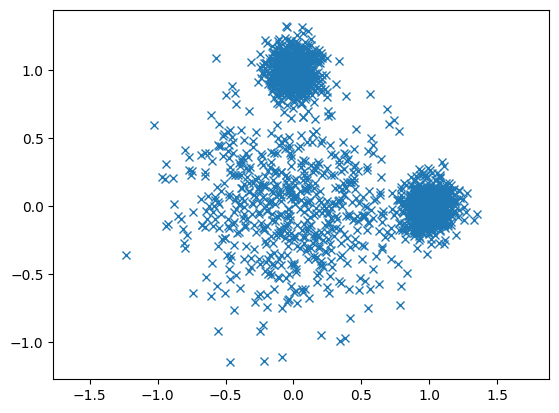

In [ ]:
# two-dimensional data
allxs=[point[0] for point in allpoints]
allys=[point[1] for point in allpoints]
plt.plot(allxs, allys, 'x')
plt.axis('equal')
plt.show()

The axes can represent anything.

How many clusters do you find?

Four steps of E-M:
1. Guessing
2. Expectation
3. Maximization
4. Convergence

#### Step1. Guessing

In [ ]:
# guessing
#initial guesses
mean1=[-1,0]
mean2=[0.5,-1]
mean3=[0.5,0.5]
allmeans=[mean1,mean2,mean3]
cov1=[[1,0],[0,1]]
cov2=[[1,0],[0,1]]
cov3=[[1,0],[0,1]]
allvar=[cov1,cov2,cov3]

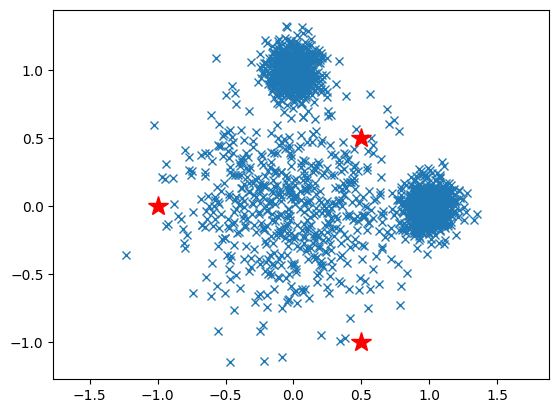

In [ ]:
# plot our guess
plt.plot(allxs, allys, 'x')
plt.plot(mean1[0],mean1[1],'r*', markersize=15)
plt.plot(mean2[0],mean2[1],'r*', markersize=15)
plt.plot(mean3[0],mean3[1],'r*', markersize=15)
plt.axis('equal')
plt.show()

Our guesses were bad. ☹

#### Step2: Expectation

In [ ]:
# expectation
def classify(allpts,allmns,allvar):
    vars=[]
    for n in range(len(allmns)):
        vars.append(multivariate_normal(mean=allmns[n], cov=allvar[n]))
    classification=[]
    for point in allpts:
        this_classification=-1
        this_pdf=0
        for n in range(len(allmns)):
            if vars[n].pdf(point)>this_pdf:
                this_pdf=vars[n].pdf(point)
                this_classification=n+1
        classification.append(this_classification)
    return classification


In [ ]:
theclass=classify(allpoints,allmeans,allvar)
print(theclass[:10])  #print the first 10 elements

[1, 1, 1, 1, 3, 1, 3, 3, 1, 3]


In [ ]:
#visualize the cluster
def makeplot(allpoints,theclass,allmeans):
   thecolors=['black']*len(allpoints)
   for idx in range(len(thecolors)):
       if theclass[idx]==2:
           thecolors[idx]='green'
       if theclass[idx]==3:
           thecolors[idx]='yellow'
   allxs=[point[0] for point in allpoints]
   allys=[point[1] for point in allpoints]
   for i in range(len(allpoints)):
       plt.scatter(allxs[i], allys[i],color=thecolors[i])  #assign color to each cluster
   for i in range(len(allmeans)):
       plt.plot(allmeans[i][0],allmeans[i][1],'b*', markersize=15)
   plt.axis('equal')
   plt.show()

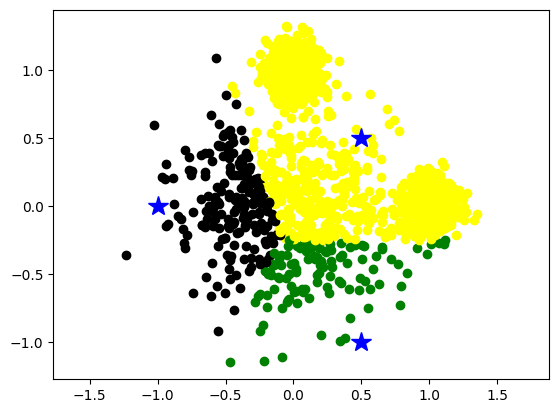

In [ ]:
makeplot(allpoints,theclass,allmeans)

#### Step 3: Maximization
take the points in each of our clusters and calculate their means and variances.

In [ ]:
#The maximization
def getcenters(allpoints,theclass,k):  #k means the number of clusters in our data
   centers=[]
   thevars=[]
   for n in range(k):
       pointsn=[allpoints[i] for i in range(0,len(allpoints)) if theclass[i]==(n+1)]
       xpointsn=[points[0] for points in pointsn]
       ypointsn=[points[1] for points in pointsn]
       xcenter=np.mean(xpointsn)
       ycenter=np.mean(ypointsn)
       centers.append([xcenter,ycenter])
       thevars.append(np.cov(xpointsn,ypointsn))
   return centers,thevars


In [ ]:
allmeans,allvar=getcenters(allpoints,theclass,3)

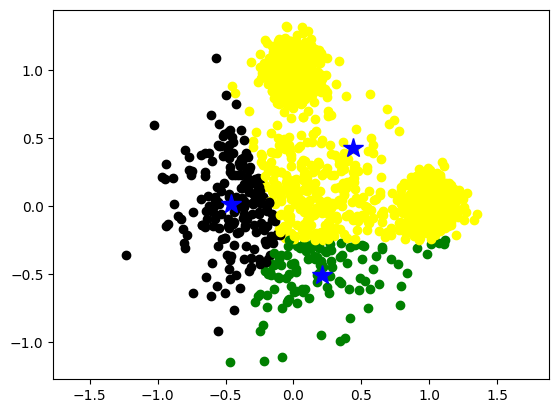

In [ ]:
makeplot(allpoints,theclass,allmeans)

In [ ]:
 # run the Expectation step again
theclass=classify(allpoints,allmeans,allvar)

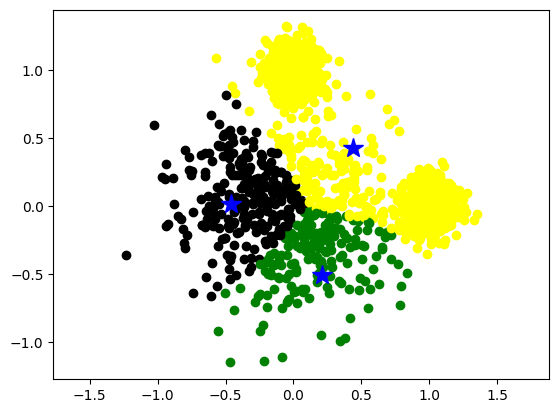

In [ ]:
# reclassified cluster
makeplot(allpoints,theclass,allmeans)

#### 4. Convergence

In [ ]:
# convergence

for n in range(0,100):
   theclass=classify(allpoints,allmeans,allvar)
   allmeans,allvar=getcenters(allpoints,theclass,3)

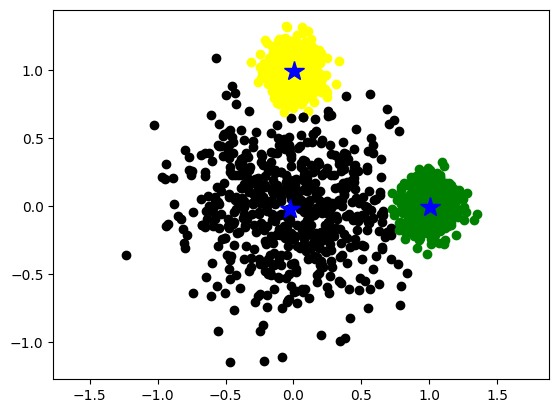

In [ ]:
#final cluster
makeplot(allpoints,theclass,allmeans)

### k-means

1. guessing
2. classification
3. adjustment
4. convergence

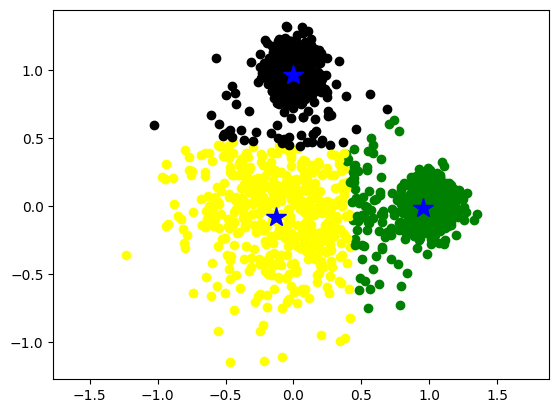

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)
kmeans.fit(allpoints)
newclass=[label+1 for label in kmeans.labels_]
makeplot(allpoints,newclass,kmeans.cluster_centers_)

what's the difference between the result of k-means and E-M clusters?
